# Project 1: Driving Licenses, Traffic Accidents and Casualties Analysis

## Problem Statment

Saudi Arabia has the highest road accident death toll in the world. Working with both datasets, we expect to find trends between the number of driving licenses and the number of traffic accidents per region. Investigating the data, we found a couple of questionable drops and peaks in both the number of driving licenses issued and the number of traffic accidents. The main observations are as follows: a) a decrease in the number of accidents in 2017, b) an unusual significant drop in the number of driving licenses issued in one of the years. After analyzing the data, we expect to justify the above observations.


## Executive Summary


There is a questionable decrease in the number of accidents in 2017, and an unusual significant drop in the number of driving licenses issued in one of the years. After Analyzing the data, we found that there is a positive relationship between number of driving licenses issued and number of accidents. We also noticed that the drop of the number of driving licenses issued in 2015 might be caused by the launch of Uber in Saudi Arabia. The decrease of the number of traffic accidents in 2017 might have been caused by many factors; the increase of fuel prices to support 2030 vision, canceling the immediate driving license test, and the implementation of new traffic laws followed by penalties for violations.

### Contents:
- [Datasets Description](#Datasets-Description)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here, including any Jupyter magic commands*

In [2967]:
#Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.random import seed
from numpy.random import randn
from scipy.stats import normaltest

plt.style.use('fivethirtyeight')
%matplotlib inline

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

## Datasets Description

[Driving Licenses](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-driving-licenses-issued-in-the-kingdom-2004-2008/information/?disjunctive.administritive_area&sort=time_period&location=5,24.37495,45.08024&basemap=jawg.streets)
This dataset contains Saudi Arabia Driving Licenses Issued By Administrative Area for 1993 - 2016. Data from General Authority for Statistics . Follow datasource.kapsarc.org for timely data to advance energy economics research.

[Traffic Accidents and Casualties](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-traffic-accidents-and-casualties-injured-dead-2008/export/?disjunctive.region&disjunctive.indicator&sort=time_period)
This dataset contains Saudi Arabia Traffic Accidents and Casualties by Region for 2016. Data from General Authority for Statistics. Follow datasource.kapsarc.org for timely data to advance energy economics research.


## Data Import and Cleaning

In [2968]:
traffic = pd.read_csv('../data/saudi-arabia-traffic-accidents-2008.csv',sep=';')
licenses = pd.read_csv('../data/saudi-arabia-driving-licenses-2004-2008.csv',sep=';')

#### 2. Display data

In [2969]:
traffic.head(10)

,Unnamed: 0,Unnamed: 0.1,Year,Region,Indicator,Value,geo_point_2d
0,0,0,(2016),Makkah,No. of Casualties - Injured,12383n,"21.628962766, 41.2636898334"
1,1,1,(2016),Eastern Region,No. of Casualties - Dead,1113n,"23.2883307307, 50.1478302439"
2,2,2,(2016),Tabouk,No. of Casualties - Dead,434n,"27.90165499, 37.2598581394"
3,3,3,(2016),Hail,No. of Casualties - Dead,299n,"27.400845724, 41.4406960508"
4,4,4,(2016),Hail,No. of Accidents,10199n,"27.400845724, 41.4406960508"
5,5,5,(2016),Northern Boarder,No. of Casualties - Dead,193n,"30.197074783, 41.8171186952"
6,6,6,(2017),Jazan,No. of Accidents,22161n,"17.2072313962, 42.6525807422"
7,7,7,(2017),Al-Jouf,No. of Accidents,10469n,"29.9677445762, 39.5570371172"
8,8,8,(2017),Total,No. of Casualties - Dead,7489n,NaN
9,9,9,(2016),Northern Boarder,No. of Casualties - Injured,631n,"30.197074783, 41.8171186952"


In [2970]:
licenses.head(10)

,Unnamed: 0,Year,Administritive Area,Driving Liceses,geo_point_2d
0,0,(2012),Makkah,143954n,"21.628962766, 41.2636898334"
1,1,(1994),Makkah,75349n,"21.628962766, 41.2636898334"
2,2,(1998),Makkah,86082n,"21.628962766, 41.2636898334"
3,3,(2004),Makkah,86636n,"21.628962766, 41.2636898334"
4,4,(2005),Makkah,65099n,"21.628962766, 41.2636898334"
5,5,(2008),Makkah,77013n,"21.628962766, 41.2636898334"
6,6,(2014),Madinah,31447n,"24.927534539, 39.4918237173"
7,7,(2013),Madinah,28513n,"24.927534539, 39.4918237173"
8,8,(2012),Madinah,14459n,"24.927534539, 39.4918237173"
9,9,(1994),Madinah,3767n,"24.927534539, 39.4918237173"


#### 3. Data Description

The traffic data shows the total number of accidents or dead/injured people of each region in Saudi Arabia, and the year the accidents have been reported.
the driving licenses data shows the total number of driving licenses that has been issued of each region in Saudi Arabia, and the year the driving licenses have been issued.


#### 4a. How complete is the data?

In [2971]:
traffic.drop('Unnamed: 0', axis=1, inplace=True)

In [2972]:
traffic.drop('Unnamed: 0.1', axis=1, inplace=True)

In [2973]:
licenses.drop('Unnamed: 0', axis=1, inplace=True)

In [2974]:
traffic.isnull().sum()

Year            0
Region          0
Indicator       0
Value           0
geo_point_2d    6
dtype: int64

In [2975]:
traffic.isnull().sum()

Year            0
Region          0
Indicator       0
Value           0
geo_point_2d    6
dtype: int64

In [2976]:
licenses.isnull().sum()

Year                    0
Administritive Area     0
Driving Liceses         0
geo_point_2d           25
dtype: int64

#### 4b. Are there any obvious issues with the observations?

In [2977]:
traffic.describe()

,Year,Region,Indicator,Value,geo_point_2d
count,84,84,84,84,78
unique,2,14,3,84,13
top,(2016),Jazan,No. of Casualties - Dead,4893n,"23.0814341634, 45.5857512766"
freq,42,6,28,1,6


In [2978]:
licenses.describe()

,Year,Administritive Area,Driving Liceses,geo_point_2d
count,350,350,350,325
unique,25,14,350,13
top,(2013),Jazan,86636n,"19.1387847401, 42.941470036"
freq,14,25,1,25


#### 5. Data Types

In [2979]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 5 columns):
Year            84 non-null object
Region          84 non-null object
Indicator       84 non-null object
Value           84 non-null object
geo_point_2d    78 non-null object
dtypes: object(5)
memory usage: 3.4+ KB


In [2980]:
licenses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 4 columns):
Year                   350 non-null object
Administritive Area    350 non-null object
Driving Liceses        350 non-null object
geo_point_2d           325 non-null object
dtypes: object(4)
memory usage: 11.1+ KB


the Value in traffic should be integer. The year and the geo_point_2d in both datasets should not be string. The year is supposed to be integer, and the geo_point_2d is supposed to be float

#### 6. Fix incorrect data types

In [2981]:
traffic['Year'] = [d.strip('(') for d in traffic['Year']]
traffic['Year'] = [d.strip(')') for d in traffic['Year']]

In [2982]:
licenses['Year'] = [d.strip('(') for d in licenses['Year']]
licenses['Year'] = [d.strip(')') for d in licenses['Year']]

In [2983]:
traffic

,Year,Region,Indicator,Value,geo_point_2d
0,2016,Makkah,No. of Casualties - Injured,12383n,"21.628962766, 41.2636898334"
1,2016,Eastern Region,No. of Casualties - Dead,1113n,"23.2883307307, 50.1478302439"
2,2016,Tabouk,No. of Casualties - Dead,434n,"27.90165499, 37.2598581394"
3,2016,Hail,No. of Casualties - Dead,299n,"27.400845724, 41.4406960508"
4,2016,Hail,No. of Accidents,10199n,"27.400845724, 41.4406960508"
...,...,...,...,...,...
79,2017,Asir,No. of Casualties - Injured,2368n,"19.1387847401, 42.941470036"
80,2017,Hail,No. of Casualties - Injured,773n,"27.400845724, 41.4406960508"
81,2017,Al-Baaha,No. of Casualties - Dead,134n,"20.1484058503, 41.4665484892"
82,2017,Al-Baaha,No. of Accidents,1414n,"20.1484058503, 41.4665484892"


In [2984]:
licenses

,Year,Administritive Area,Driving Liceses,geo_point_2d
0,2012,Makkah,143954n,"21.628962766, 41.2636898334"
1,1994,Makkah,75349n,"21.628962766, 41.2636898334"
2,1998,Makkah,86082n,"21.628962766, 41.2636898334"
3,2004,Makkah,86636n,"21.628962766, 41.2636898334"
4,2005,Makkah,65099n,"21.628962766, 41.2636898334"
...,...,...,...,...
345,2000,Tabouk,8473n,"27.90165499, 37.2598581394"
346,2006,Tabouk,8259n,"27.90165499, 37.2598581394"
347,2013,Hail,9731n,"27.400845724, 41.4406960508"
348,1997,Hail,6606n,"27.400845724, 41.4406960508"


In [2985]:
traffic['Year'] = pd.to_numeric(traffic.Year)

In [2986]:
licenses['Year'] = pd.to_numeric(licenses.Year)

In [2987]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 5 columns):
Year            84 non-null int64
Region          84 non-null object
Indicator       84 non-null object
Value           84 non-null object
geo_point_2d    78 non-null object
dtypes: int64(1), object(4)
memory usage: 3.4+ KB


In [2988]:
traffic.head()

,Year,Region,Indicator,Value,geo_point_2d
0,2016,Makkah,No. of Casualties - Injured,12383n,"21.628962766, 41.2636898334"
1,2016,Eastern Region,No. of Casualties - Dead,1113n,"23.2883307307, 50.1478302439"
2,2016,Tabouk,No. of Casualties - Dead,434n,"27.90165499, 37.2598581394"
3,2016,Hail,No. of Casualties - Dead,299n,"27.400845724, 41.4406960508"
4,2016,Hail,No. of Accidents,10199n,"27.400845724, 41.4406960508"


In [2989]:
licenses.head()

,Year,Administritive Area,Driving Liceses,geo_point_2d
0,2012,Makkah,143954n,"21.628962766, 41.2636898334"
1,1994,Makkah,75349n,"21.628962766, 41.2636898334"
2,1998,Makkah,86082n,"21.628962766, 41.2636898334"
3,2004,Makkah,86636n,"21.628962766, 41.2636898334"
4,2005,Makkah,65099n,"21.628962766, 41.2636898334"


- Make new columns `x` and `y` using `geo_point_2d`

In [2990]:
traffic[['x','y']]= traffic.geo_point_2d.str.split(", ",expand=True) 

In [2991]:
licenses[['x','y']]= licenses.geo_point_2d.str.split(", ",expand=True) 

In [2992]:
traffic[['No._of','condition']]= traffic.Indicator.str.split("- ",expand=True) 

In [2993]:
traffic['No._of'].unique()

array(['No. of Casualties ', 'No. of Accidents'], dtype=object)

In [2994]:
traffic['condition'].unique()

array(['Injured', 'Dead', None], dtype=object)

In [2995]:
licenses

,Year,Administritive Area,Driving Liceses,geo_point_2d,x,y
0,2012,Makkah,143954n,"21.628962766, 41.2636898334",21.628962766,41.2636898334
1,1994,Makkah,75349n,"21.628962766, 41.2636898334",21.628962766,41.2636898334
2,1998,Makkah,86082n,"21.628962766, 41.2636898334",21.628962766,41.2636898334
3,2004,Makkah,86636n,"21.628962766, 41.2636898334",21.628962766,41.2636898334
4,2005,Makkah,65099n,"21.628962766, 41.2636898334",21.628962766,41.2636898334
...,...,...,...,...,...,...
345,2000,Tabouk,8473n,"27.90165499, 37.2598581394",27.90165499,37.2598581394
346,2006,Tabouk,8259n,"27.90165499, 37.2598581394",27.90165499,37.2598581394
347,2013,Hail,9731n,"27.400845724, 41.4406960508",27.400845724,41.4406960508
348,1997,Hail,6606n,"27.400845724, 41.4406960508",27.400845724,41.4406960508


- Fix any individual values preventing other columns from being the appropriate type.

In [2996]:
traffic['Value'] = [d.strip('n') for d in traffic['Value']]
licenses['Driving Liceses'] = [d.strip('n') for d in licenses['Driving Liceses']]

In [2997]:
traffic['Value'] = traffic['Value'].astype(int)
licenses['Driving Liceses'] = licenses['Driving Liceses'].astype(int)

In [2998]:
traffic = traffic.drop(['geo_point_2d'], axis=1)

In [2999]:
licenses = licenses.drop(['geo_point_2d'], axis=1)

In [3000]:
licenses

,Year,Administritive Area,Driving Liceses,x,y
0,2012,Makkah,143954,21.628962766,41.2636898334
1,1994,Makkah,75349,21.628962766,41.2636898334
2,1998,Makkah,86082,21.628962766,41.2636898334
3,2004,Makkah,86636,21.628962766,41.2636898334
4,2005,Makkah,65099,21.628962766,41.2636898334
...,...,...,...,...,...
345,2000,Tabouk,8473,27.90165499,37.2598581394
346,2006,Tabouk,8259,27.90165499,37.2598581394
347,2013,Hail,9731,27.400845724,41.4406960508
348,1997,Hail,6606,27.400845724,41.4406960508


In [3001]:
traffic.head()

,Year,Region,Indicator,Value,x,y,No._of,condition
0,2016,Makkah,No. of Casualties - Injured,12383,21.628962766,41.2636898334,No. of Casualties,Injured
1,2016,Eastern Region,No. of Casualties - Dead,1113,23.2883307307,50.1478302439,No. of Casualties,Dead
2,2016,Tabouk,No. of Casualties - Dead,434,27.90165499,37.2598581394,No. of Casualties,Dead
3,2016,Hail,No. of Casualties - Dead,299,27.400845724,41.4406960508,No. of Casualties,Dead
4,2016,Hail,No. of Accidents,10199,27.400845724,41.4406960508,No. of Accidents,None


- Finish your data modifications by making sure the columns are now typed appropriately.

In [3002]:
licenses['x'] = pd.to_numeric(licenses.x)
licenses['y'] = pd.to_numeric(licenses.y)
traffic['x'] = pd.to_numeric(traffic.x)
traffic['y'] = pd.to_numeric(traffic.y)



In [3003]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 8 columns):
Year         84 non-null int64
Region       84 non-null object
Indicator    84 non-null object
Value        84 non-null int64
x            78 non-null float64
y            78 non-null float64
No._of       84 non-null object
condition    56 non-null object
dtypes: float64(2), int64(2), object(4)
memory usage: 5.4+ KB


In [3004]:
licenses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
Year                   350 non-null int64
Administritive Area    350 non-null object
Driving Liceses        350 non-null int64
x                      325 non-null float64
y                      325 non-null float64
dtypes: float64(2), int64(2), object(1)
memory usage: 13.8+ KB


#### 7. Renamaming columns

In [403]:
traffic = traffic.rename(columns={"Indicator": "Index", "No. of Casualties - Dead": "Dead", "No. of Casualties - Injured" : "Injured"})
traffic = traffic.rename(columns={"No. of Accidents":"Accidents"})

In [3005]:
licenses = licenses.rename(columns={'Driving Liceses': 'driving_licenses','Administritive Area':'region'})

In [3006]:
traffic.columns = traffic.columns.str.lower()
licenses.columns = licenses.columns.str.lower()

In [3007]:
licenses.head()

,year,region,driving_licenses,x,y
0,2012,Makkah,143954,21.628963,41.26369
1,1994,Makkah,75349,21.628963,41.26369
2,1998,Makkah,86082,21.628963,41.26369
3,2004,Makkah,86636,21.628963,41.26369
4,2005,Makkah,65099,21.628963,41.26369


In [3135]:
traffic.head()

index,region,year,x,y,accidents,dead,injured
0,Al-Baha,2016,20.148406,41.466548,3618,185,1227
1,Al-Baha,2017,20.148406,41.466548,1414,134,1007
2,Al-Jouf,2016,29.967745,39.557037,10212,245,920
3,Al-Jouf,2017,29.967745,39.557037,10469,240,862
4,Asir,2016,19.138785,42.941470,32684,983,2541


#### 8. Data dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**year**|*integer*|Traffic_Accidents|The year the traffic accidents have been reported.| 
|**x**|*float*|Traffic_Accidents|The X geographic cooedinate of the traffic accidents.|
|**y**|*float*|Traffic_Accidents|The y geographic coordinate of the traffic accidents.| 
|**region**|*String*|Traffic_Accidents|The region where the traffic accidents have been reported.| 
|**accidents**|*integer*|Traffic_Accidents|The number of accidents that has been reported.| 
|**dead**|*integer*|Traffic_Accidents|The number of dead passengers that has been reported.| 
|**injured**|*integer*|Traffic_Accidents|The numberof injured passengers that has been reported.| 
|**year**|*integer*|Driving_Licenses|The year the driving licenses have been issued.| 
|**region**|*String*|Driving_Licenses|The area where the driving licenses have been issued.| 
|**driving_licenses**|*Integer*|Driving_Licenses|The number of driving licenses that has been issued.| 
|**x**|*float*|Driving_Licenses|The X geographic cooedinate of the region.|
|**y**|*float*|Driving_Licenses|The y geographic coordinate of the region.| 



#### 9. Dropping unnecessary rows

In [3008]:
licenses.region.unique()

array(['Makkah', 'Madinah', 'Al-Qaseem', 'Eastern', 'Assir', 'Tabouk',
       'Hail', 'Northern Boarder', 'Jazan', 'Najran', 'Al-Baha',
       'Al-Jouf', 'Total', 'Riyadh'], dtype=object)

In [3009]:
traffic.region.unique()

array(['Makkah', 'Eastern Region', 'Tabouk', 'Hail', 'Northern Boarder',
       'Jazan', 'Al-Jouf', 'Total', 'Al-Baaha', 'Riyadh', 'Madinah',
       'Qassim', 'Najran', 'Asir'], dtype=object)

In [3010]:
traffic[traffic['region'] == 'Total']

,year,region,indicator,value,x,y,no._of,condition
8,2017,Total,No. of Casualties - Dead,7489,NaN,NaN,No. of Casualties,Dead
29,2016,Total,No. of Accidents,533380,NaN,NaN,No. of Accidents,None
30,2016,Total,No. of Casualties - Injured,38120,NaN,NaN,No. of Casualties,Injured
68,2017,Total,No. of Accidents,460488,NaN,NaN,No. of Accidents,None
69,2017,Total,No. of Casualties - Injured,33199,NaN,NaN,No. of Casualties,Injured
77,2016,Total,No. of Casualties - Dead,9031,NaN,NaN,No. of Casualties,Dead


In [3011]:
totall = licenses[licenses['region'] == 'Total'].groupby('year').sum()[['driving_licenses']]


In [3012]:
no_totall = licenses[licenses['region'] != 'Total'].groupby('year').sum()[['driving_licenses']]

In [3013]:
totall == no_totall

,driving_licenses
year,
1993,True
1994,True
1995,True
1996,True
1997,True
1998,True
1999,True
2000,True
2001,True


In [3014]:
total_not = traffic[(traffic['region'] != 'Total')].groupby(['indicator','year']).sum()[['value']]

In [3015]:
total_t = traffic[(traffic['region'] == 'Total')].groupby(['indicator','year']).sum()[['value']]

In [3016]:
total_not == total_t

value
indicator                   year       
No. of Accidents            2016   True
                            2017   True
No. of Casualties - Dead    2016   True
                            2017   True
No. of Casualties - Injured 2016   True
                            2017   True

In [3017]:
licenses.dropna(inplace=True)

In [3018]:
traffic = traffic[(traffic['region'] != 'Total')]

 rows that contain Total as region.

#### 10a. Data formats

License data is in the wide format, but traffic data is in long format. because of the value column.

#### 10b. Changing formats

In [3019]:
traffic[['region']] = traffic.region.map({'Al-Baaha':'Al-Baha','Eastern Region':'Eastern','Northern Boarder':'Northern Border','Asir':'Asir'
                      ,'Al-Jouf':'Al-Jouf','Hail':'Hail','Jazan':'Jazan','Madinah':'Madinah','Makkah':'Makkah'
                      ,'Najran':'Najran', 'Qassim':'Qassim','Riyadh':'Riyadh','Tabouk': 'Tabouk'})

In [3020]:
licenses[['region']] = licenses['region'].map({'Al-Baha':'Al-Baha','Eastern':'Eastern','Northern Boarder':'Northern Border','Assir':'Asir'
                      ,'Al-Jouf':'Al-Jouf','Hail':'Hail','Jazan':'Jazan','Madinah':'Madinah','Makkah':'Makkah'
                      ,'Najran':'Najran', 'Al-Qaseem':'Qassim','Riyadh':'Riyadh','Tabouk': 'Tabouk'})

In [3021]:
traffic = traffic.pivot_table(index=['region','year','x','y'], columns ='indicator', values = 'value')

In [3022]:
traffic.columns.rename('index',inplace=True)

In [3023]:
traffic.columns = traffic.columns.str.lower()


In [3024]:
traffic = traffic.rename(columns={'no. of accidents': 'accidents','no. of casualties - dead':'dead','no. of casualties - injured':'injured'})

In [3025]:
licenses.region

0      Makkah
1      Makkah
2      Makkah
3      Makkah
4      Makkah
        ...  
345    Tabouk
346    Tabouk
347      Hail
348      Hail
349      Hail
Name: region, Length: 325, dtype: object

In [3026]:
traffic.columns

Index(['accidents', 'dead', 'injured'], dtype='object', name='index')

#### 11. Merging dataframes

In [3027]:
inner_merge = pd.merge(licenses,
                 traffic,
                 on= ['region', 'year'])

In [3028]:
inner_merge

,year,region,driving_licenses,x,y,accidents,dead,injured
0,2017,Hail,22035,27.400846,41.440696,9379,265,773
1,2017,Northern Border,5280,30.197075,41.817119,11540,112,374
2,2016,Al-Baha,4614,20.148406,41.466548,3618,185,1227
3,2017,Qassim,6318,26.196706,43.343000,22405,319,1446
4,2017,Eastern,126816,23.288331,50.147830,81433,963,4073
5,2017,Tabouk,10232,27.901655,37.259858,11713,348,1243
6,2016,Northern Border,4958,30.197075,41.817119,13196,193,631
7,2016,Najran,2153,18.451100,46.868850,3235,173,706
8,2017,Makkah,142487,21.628963,41.263690,145541,1641,10623
9,2016,Makkah,136055,21.628963,41.263690,134838,2243,12383


In [3029]:
#i created this dataframe as the one above does not cotain all the values of driving licenses dataset, 
#although it contains null values
outer_merge = pd.merge(licenses,
                 traffic,
                 on= ['region', 'year'], how='outer')

In [3030]:
outer_merge.head(10)

,year,region,driving_licenses,x,y,accidents,dead,injured
0,2012,Makkah,143954,21.628963,41.263690,NaN,NaN,NaN
1,1994,Makkah,75349,21.628963,41.263690,NaN,NaN,NaN
2,1998,Makkah,86082,21.628963,41.263690,NaN,NaN,NaN
3,2004,Makkah,86636,21.628963,41.263690,NaN,NaN,NaN
4,2005,Makkah,65099,21.628963,41.263690,NaN,NaN,NaN
5,2008,Makkah,77013,21.628963,41.263690,NaN,NaN,NaN
6,2014,Madinah,31447,24.927535,39.491824,NaN,NaN,NaN
7,2013,Madinah,28513,24.927535,39.491824,NaN,NaN,NaN
8,2012,Madinah,14459,24.927535,39.491824,NaN,NaN,NaN
9,1994,Madinah,3767,24.927535,39.491824,NaN,NaN,NaN


#### 12. Saving clean, merged data.

In [3031]:
inner_merge.to_csv('../data/combined_datasets.csv')

## Exploratory Data Analysis


### Summary Statistics

In [3125]:
outer_merge.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,325.0,2005.000000,7.222222,1993.000000,1999.000000,2005.000000,2011.000000,2017.000000
driving_licenses,325.0,28915.347692,47419.058819,915.000000,4846.000000,10267.000000,25423.000000,495307.000000
x,325.0,23.810447,4.197987,17.207231,20.148406,23.288331,27.400846,30.197075
y,325.0,42.602789,3.254196,37.259858,41.263690,41.817119,43.343000,50.147830
accidents,26.0,38225.692308,46493.705035,1414.000000,10276.250000,16050.500000,30981.250000,145541.000000
dead,26.0,635.384615,549.783381,112.000000,241.250000,415.500000,929.250000,2243.000000
injured,26.0,2743.038462,2922.641127,374.000000,923.000000,1618.500000,3784.000000,12383.000000


#### Manually calculating standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$


In [3033]:
import math
def stanDev(v):
    length = len(v)
    m = sum(v)/len(v)
    total_sum = 0
    for i in range(length): 
        total_sum += (v[i]-m)**2
        stan_dev = math.sqrt(total_sum/length)
    return stan_dev

In [3034]:
sd ={col.name:stanDev(col) for col in [outer_merge[i] for i in outer_merge.columns if (outer_merge[i].dtype=='float64') or (outer_merge[i].dtype=='int64')]}

In [3035]:
sd

{'year': 7.211102550927978,
 'driving_licenses': 47346.0502174464,
 'x': 4.191524025811861,
 'y': 3.2491853051316912,
 'accidents': nan,
 'dead': nan,
 'injured': nan}

In [3036]:
sd_np ={col.name:np.std(col) for col in [outer_merge[i] for i in outer_merge.columns if (outer_merge[i].dtype=='float64') or (outer_merge[i].dtype=='int64')]}

In [3037]:
sd_np

{'year': 7.211102550927978,
 'driving_licenses': 47346.0502174464,
 'x': 4.191524025811861,
 'y': 3.2491853051316912,
 'accidents': 45590.82869880505,
 'dead': 539.1069593406002,
 'injured': 2865.885411322023}

In [3038]:
min_lic = licenses.sort_values('driving_licenses',ascending=True).groupby('year').first()

In [3039]:
max_lic = licenses.sort_values('driving_licenses',ascending=False).groupby('year').first()

In [3040]:
lic = pd.merge(min_lic[['region','driving_licenses']],
                 max_lic[['region','driving_licenses']],
                 on= ['year'], suffixes=('_min','_max'))

In [3041]:
#highest 
lic.region_max.unique()

array(['Riyadh', 'Makkah', 'Eastern'], dtype=object)

In [3042]:
#lowest
lic.region_min.unique()

array(['Northern Border', 'Al-Baha', 'Tabouk', 'Najran'], dtype=object)

Highest number of driving licenses is Riyadh, Makkah, Eastern Province and the lowest is Northern Border, Al-baha, and Najran.

In [3043]:
sum_accidents = traffic.groupby(['region','year']).sum()
mean_accidents = sum_accidents//2

In [3216]:
mean_accidents

index                 accidents  dead  injured
region          year                          
Al-Baha         2016       1809    92      613
                2017        707    67      503
Al-Jouf         2016       5106   122      460
                2017       5234   120      431
Asir            2016      16342   491     1270
                2017      12622   414     1184
Eastern         2016      50809   556     2446
                2017      40716   481     2036
Hail            2016       5099   149      466
                2017       4689   132      386
Jazan           2016      12936   257     1129
                2017      11080   233     1103
Madinah         2016       7237   411     2092
                2017       8035   290     1458
Makkah          2016      67419  1121     6191
                2017      72770   820     5311
Najran          2016       1617    86      353
                2017       1596    97      383
Northern Border 2016       6598    96      315
                2017       5770    56      187
Qassim          2016      12832   198      756
                2017      11202   159      723
Riyadh          2016      70868   715     2103
                2017      49962   699     2270
Tabouk          2016       8015   217      862
                2017       5856   174      621

In [3044]:
mean_accidents.sort_values('accidents',ascending=False).head(1)

,index,accidents,dead,injured
region,year,,,
Makkah,2017,72770,820,5311


In [3045]:
mean_accidents.sort_values('accidents',ascending=True).head(1)

,index,accidents,dead,injured
region,year,,,
Al-Baha,2017,707,67,503


Answer:

Highest mean traffic accidents is Makkah and the lowest is Al-baha.

In [3046]:
year_mean = licenses.groupby(['year']).mean()
year_mean.reset_index(inplace=True)

In [3047]:
meanl = pd.merge(licenses,
                 year_mean,
                 on= ['year'])

In [3048]:
suml = meanl.groupby(['region','year']).sum()

In [3049]:
suml.reset_index(inplace=True)

In [3050]:
above_av_lic = suml[(suml['driving_licenses_x'] > suml['driving_licenses_y'])].groupby((['year','region'])).first()

In [3051]:
above_av_lic.index

MultiIndex([(1993,  'Makkah'),
            (1993,  'Qassim'),
            (1993,  'Riyadh'),
            (1994,  'Makkah'),
            (1994,  'Qassim'),
            (1994,  'Riyadh'),
            (1995,  'Makkah'),
            (1995,  'Qassim'),
            (1995,  'Riyadh'),
            (1996,  'Makkah'),
            (1996,  'Qassim'),
            (1996,  'Riyadh'),
            (1997, 'Eastern'),
            (1997,  'Makkah'),
            (1997,  'Riyadh'),
            (1998, 'Eastern'),
            (1998,  'Makkah'),
            (1998,  'Riyadh'),
            (1999, 'Eastern'),
            (1999,  'Makkah'),
            (1999,  'Riyadh'),
            (2000, 'Eastern'),
            (2000,  'Makkah'),
            (2000,  'Riyadh'),
            (2001, 'Eastern'),
            (2001,  'Makkah'),
            (2002, 'Eastern'),
            (2002,  'Makkah'),
            (2002,  'Riyadh'),
            (2003, 'Eastern'),
            (2003,  'Makkah'),
            (2003,  'Riyadh'),
        

In [3052]:
above_av_lic.reset_index(inplace=True)

In [3053]:
above_av_lic.region.unique()

array(['Makkah', 'Qassim', 'Riyadh', 'Eastern', 'Asir', 'Hail'],
      dtype=object)

Asir, Eastern Province, Makkah, Hail, and Qassim have more driving Licenses issued in each year than the year average.

In [3054]:
traffic.reset_index(inplace=True)

In [3055]:
year_mean2 = traffic.groupby(['year']).mean()

In [3056]:
meant = pd.merge(traffic,
                 year_mean2,
                 on= ['year'])

In [3057]:
sumt = meant.groupby(['region','year']).sum()

In [3058]:
sumt.reset_index(inplace=True)

In [3059]:
above_av_acc = sumt[(sumt['accidents_x'] > sumt['accidents_y'])].groupby(['year','region']).first()

In [3060]:
above_av_acc.index

MultiIndex([(2016, 'Eastern'),
            (2016,  'Makkah'),
            (2016,  'Riyadh'),
            (2017, 'Eastern'),
            (2017,  'Makkah'),
            (2017,  'Riyadh')],
           names=['year', 'region'])

In [3061]:
above_av_acc.reset_index(inplace=True)

In [3062]:
above_av_acc.region.unique()

array(['Eastern', 'Makkah', 'Riyadh'], dtype=object)

Eastern Province, Makkah, and Riyadh have more accidents reported in each year than the year average.

## Data Visualization

Text(35.959374999999994, 0.5, 'Features')

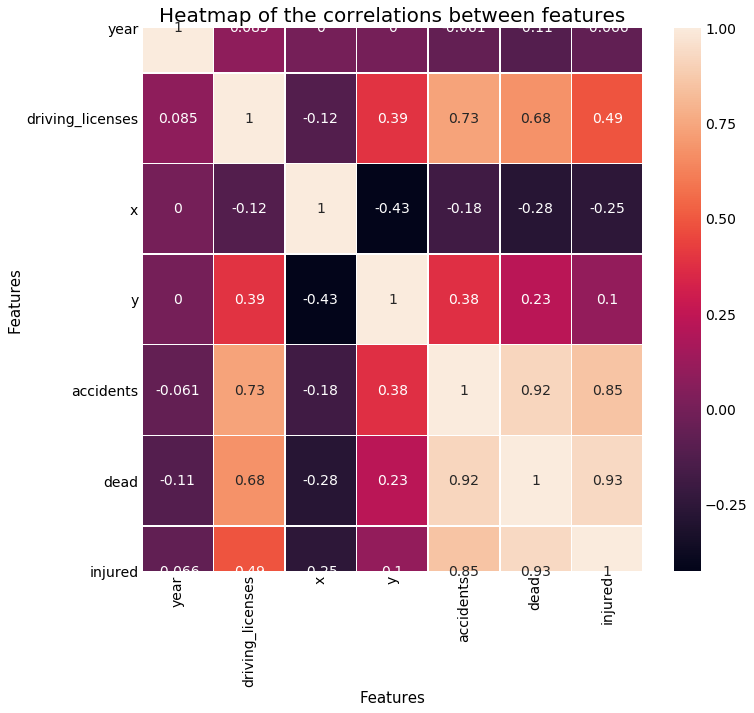

In [3063]:
fig, ax = plt.subplots(figsize=(10,10))  
tmap = sns.heatmap(inner_merge.corr(),annot=True,linewidths=.5, ax=ax)

plt.title('Heatmap of the correlations between features', fontsize = 20)
plt.xlabel('Features', fontsize = 15)
plt.ylabel('Features', fontsize = 15)


Interpretation:

We notice a high correlation between the number of driving licenses issued and the number of accidents.
    

In [3064]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index 'value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to a
        #add more settings
        for i,title in enumerate(list_of_titles): # Gives us an index 'value to get into all our lists
            plt.title(title[i])
            for i, label in enumerate(list_of_xlabels):
                plt.xlabel(label[i])
                return plt.show()
        # Set titles, labels, etc here for each subplot

#### Plotting and interpreting histograms 

(array([266.,  28.,  24.,   5.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([   915. ,  50354.2,  99793.4, 149232.6, 198671.8, 248111. ,
        297550.2, 346989.4, 396428.6, 445867.8, 495307. ]),
 <a list of 10 Patch objects>)

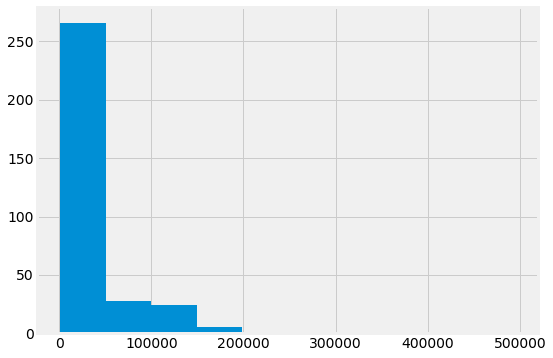

In [3065]:
plt.hist(outer_merge.driving_licenses,bins=10)


In [3066]:
fig = plt.figure(figsize=(20,5))

<Figure size 1440x360 with 0 Axes>

(array([4., 6., 4., 2., 3., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        2., 0., 0., 0., 0., 0., 1., 2.]),
 array([  1414.  ,   7179.08,  12944.16,  18709.24,  24474.32,  30239.4 ,
         36004.48,  41769.56,  47534.64,  53299.72,  59064.8 ,  64829.88,
         70594.96,  76360.04,  82125.12,  87890.2 ,  93655.28,  99420.36,
        105185.44, 110950.52, 116715.6 , 122480.68, 128245.76, 134010.84,
        139775.92, 145541.  ]),
 <a list of 25 Patch objects>)

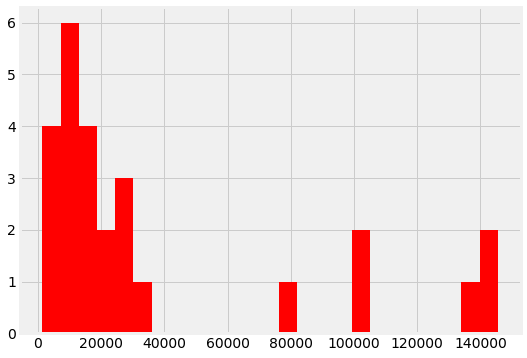

In [3067]:
plt.hist(inner_merge.accidents,bins=25,color='r')
#plt.legend('accidents')

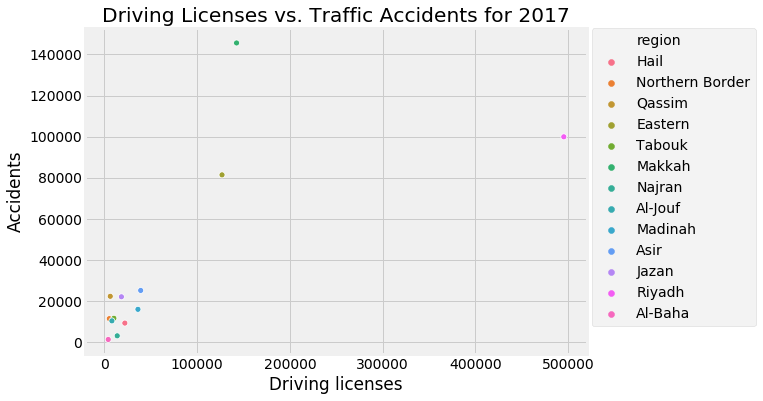

In [3167]:
data = inner_merge[(inner_merge['year'] == 2017)]
sns.scatterplot(data.driving_licenses,data.accidents, hue=data.region)
plt.xlabel('Driving licenses')
plt.ylabel('Accidents')
plt.title('Driving Licenses vs. Traffic Accidents for 2017')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.);

Interpretation:

We observe the three outliers Riyadh, Eastern Province, and Makkah.

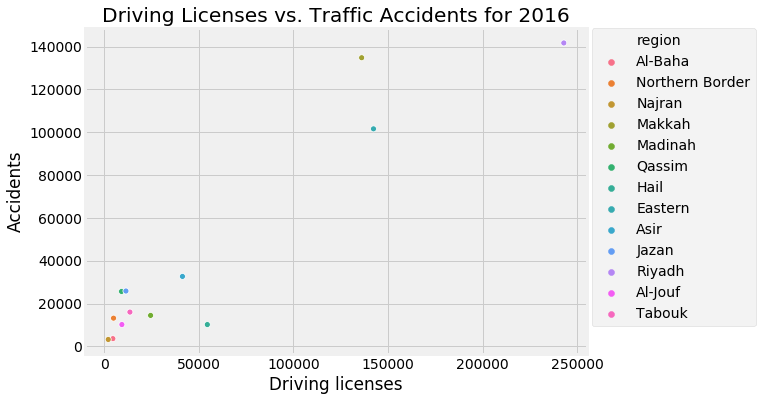

In [3166]:
data = inner_merge[(inner_merge['year'] == 2016)]
sns.scatterplot(data.driving_licenses,data.accidents,hue=data.region)
plt.xlabel('Driving licenses')
plt.ylabel('Accidents')
plt.title('Driving Licenses vs. Traffic Accidents for 2016')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.);

Interpretation:

We observe the three outliers Riyadh, Eastern Province, and Makkah again.


Text(0.5, 1.0, 'Driving Licenses for 2016 vs 2017')

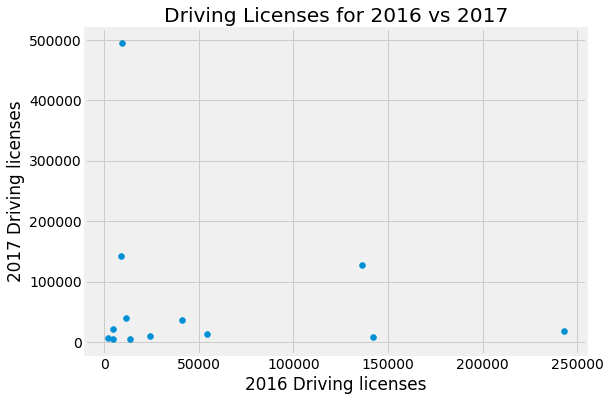

In [3178]:
plt.scatter(outer_merge[(outer_merge['year'] == 2016)].driving_licenses,outer_merge[(outer_merge['year'] == 2017)].driving_licenses)
plt.xlabel('2016 Driving licenses')
plt.ylabel('2017 Driving licenses')
plt.title('Driving Licenses for 2016 vs 2017')

Interpretation:


We observe that there is not a clear correlation between the number of driving licenses issued in 2016 and 2017.

Text(0.5, 1.0, 'Traffic Accidents for 2016 vs 2017')

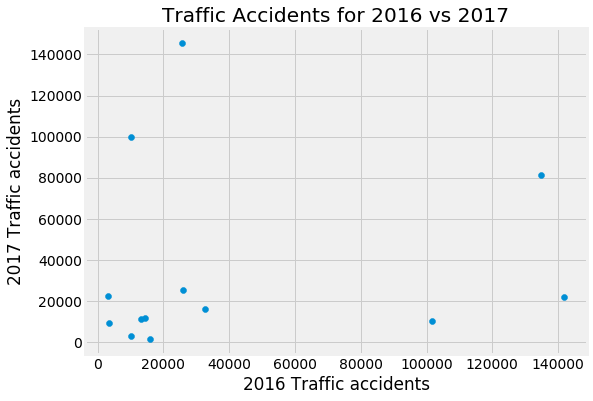

In [3172]:
plt.scatter(inner_merge[(inner_merge['year'] == 2016)].accidents,inner_merge[(inner_merge['year'] == 2017)].accidents)
plt.xlabel('2016 Traffic accidents')
plt.ylabel('2017 Traffic accidents')
plt.title('Traffic Accidents for 2016 vs 2017')

#### Plotting and interpretting boxplots

Text(0, 0.5, 'Dead and injured')

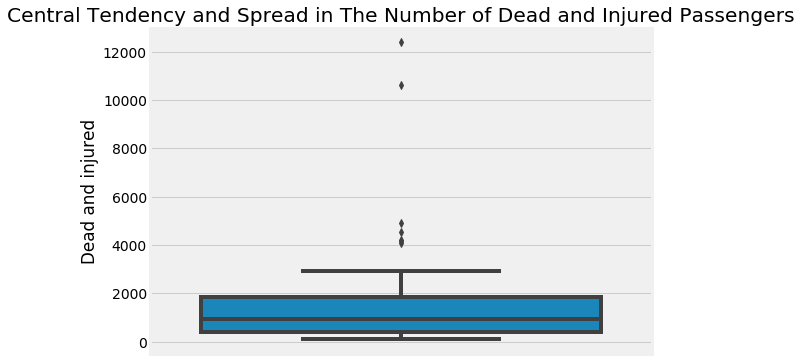

In [3191]:
sns.boxplot(y=['dead','injured'],data=outer_merge)
plt.title('Central Tendency and Spread in The Number of Dead and Injured Passengers')
plt.ylabel('Dead and injured')

Interpretation:

There is a short scale and a couple of outliers.

Text(0, 0.5, 'Traffic Accidents')

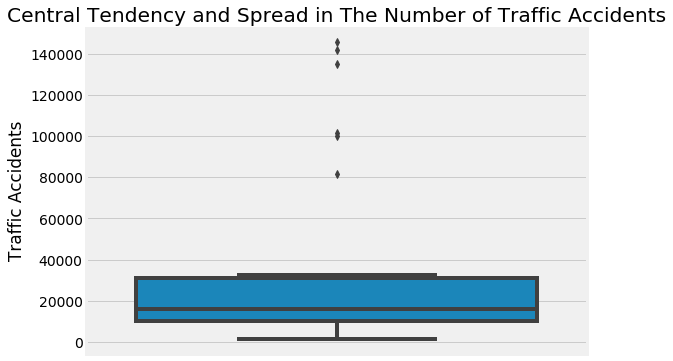

In [3190]:
sns.boxplot(y='accidents',data=outer_merge)
plt.title('Central Tendency and Spread in The Number of Traffic Accidents')
plt.ylabel('Traffic Accidents')

Interpretation:

There is a short scale and a couple of outliers.

Text(0, 0.5, 'Dead')

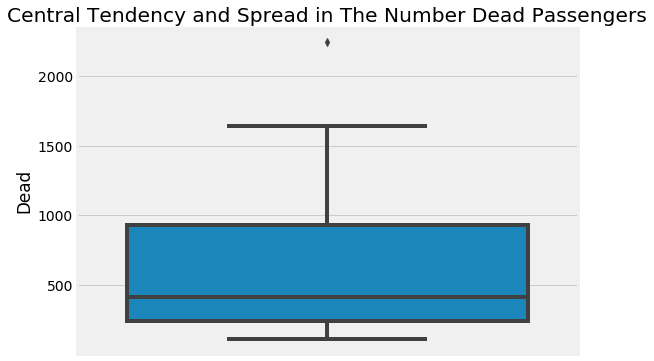

In [3189]:
sns.boxplot(y='dead',data=outer_merge)
plt.title('Central Tendency and Spread in The Number Dead Passengers')
plt.ylabel('Dead')

Interpretation:

There is a long scale of the number of people reported dead in accidents and there is barely any extreme value(outlier)

Text(0, 0.5, 'Injured')

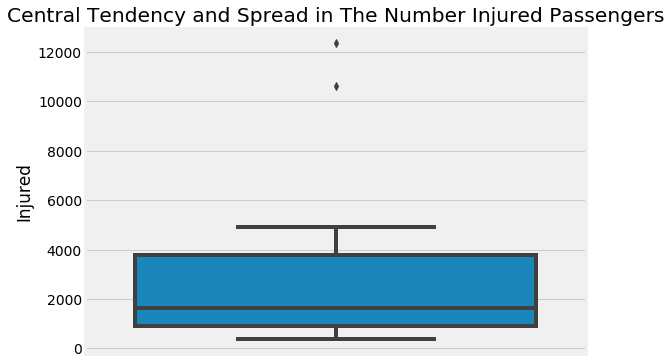

In [3192]:
sns.boxplot(y='injured',data=outer_merge, )
plt.title('Central Tendency and Spread in The Number Injured Passengers')
plt.ylabel('Injured')

Interpretation:

There is a somewhat long scale of the number of people reported injured in accidents and there are little extreme values outside the range.

Text(0, 0.5, 'Driving Licenses')

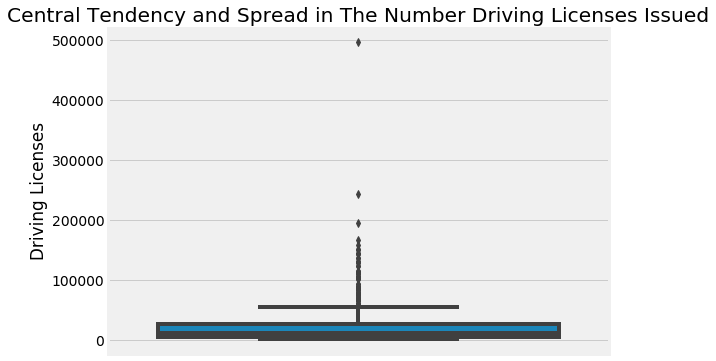

In [3193]:
sns.boxplot(y='driving_licenses',data=outer_merge )
plt.title('Central Tendency and Spread in The Number Driving Licenses Issued')
plt.ylabel('Driving Licenses')

Interpretation:

There is a short scale of the number of driving licenses issued and there are a lot of outliers outside the range.

Text(0, 0.5, 'Number of Driving Licenses')

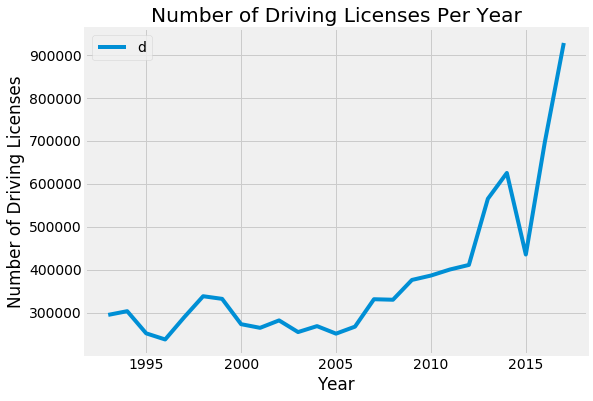

In [3078]:
plt.plot(outer_merge.groupby(['year']).sum().driving_licenses);
plt.legend('driving licenses')
plt.title('Number of Driving Licenses Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Driving Licenses')

Interpretation:

We notice there is a drop of the number of driving licenses in 2015.


Text(0, 0.5, 'Accidents')

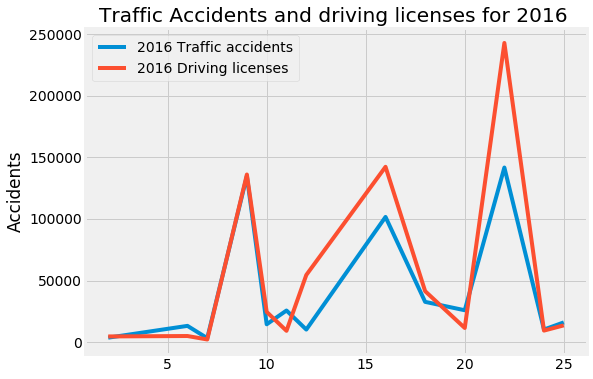

In [3081]:
plt.plot(inner_merge[(inner_merge['year'] == 2016)].accidents);
plt.plot(inner_merge[(inner_merge['year'] == 2016)].driving_licenses);
plt.legend(['2016 Traffic accidents','2016 Driving licenses'])
plt.title('Traffic Accidents and driving licenses for 2016 ')
plt.xlabel('')
plt.ylabel('Accidents')

Interpretation:

We clearly observe a positive relationship between the number of traffic accidents and the driving licenses issued in 2016

Text(0, 0.5, 'Accidents')

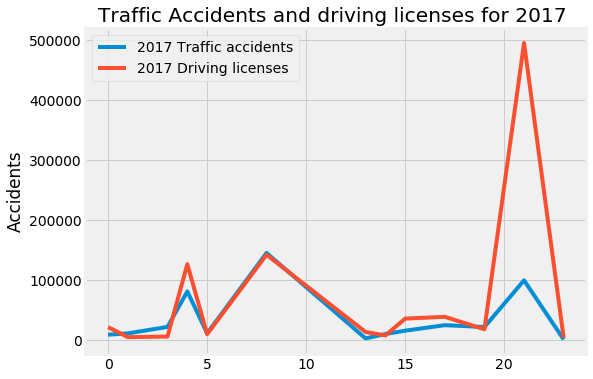

In [3194]:
plt.plot(inner_merge[(inner_merge['year'] == 2017)].accidents);
plt.plot(inner_merge[(inner_merge['year'] == 2017)].driving_licenses);
plt.legend(['2017 Traffic accidents','2017 Driving licenses'])
plt.title('Traffic Accidents and driving licenses for 2017 ')
plt.ylabel('Accidents')

Interpretation:
    
We notice a gap between number of driving licenses and traffic accidents.

In [3201]:
df_year = inner_merge.groupby(['year']).first()[['driving_licenses','accidents']]
df_year['perc'] = (df_year['accidents'] / df_year['driving_licenses'])*100
df_year

,driving_licenses,accidents,perc
year,,,
2016,4614,3618,78.413524
2017,22035,9379,42.564103


In [3202]:
78.413524 - 42.564103 

35.84942099999999

Text(0.5, 1.0, 'The Total Number of Driving Licenses and Accidents Per Year')

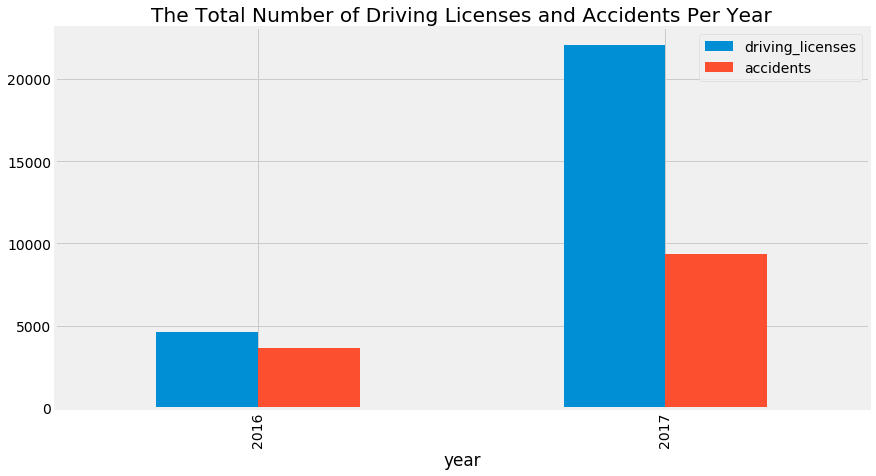

In [3197]:
inner_merge.groupby(['year']).first()[['driving_licenses','accidents']].plot(kind='bar',figsize=(13,7));
plt.title('The Total Number of Driving Licenses and Accidents Per Year')

Interpretation:

The number of driving licenses issued in 2017 dramatically increased while the number of accidents did not increased dramatically accordingly. Taking the number of accidents per year and dividing it by the number of driving licenses per year, we found that in 2016 the number of accidents increased by 78% in regard to the number of driving licenses issued. Whereas in 2017, it increased only by 42%. This means that the number of traffic accidents in comparison to the number of driving licenses issued dropped by almost 36%.

Text(0.5, 1.0, 'The Average Number of Driving Licenses and  Traffic Accidents per Region in 2016-2017')

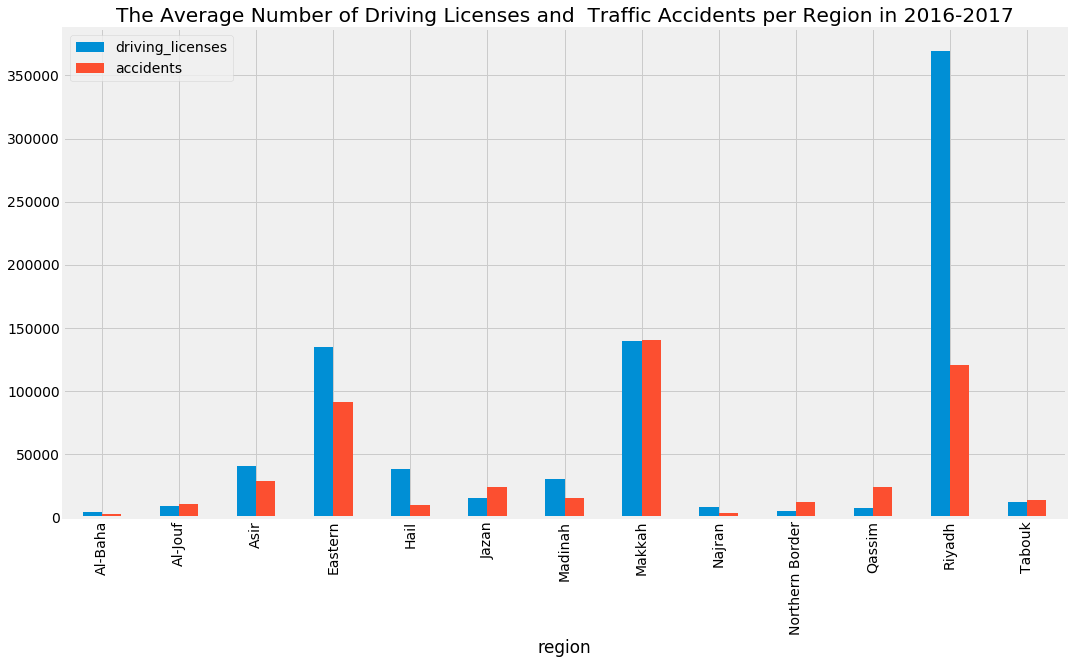

In [3217]:
inner_merge.groupby(['region']).mean()[['driving_licenses','accidents']].plot(kind='bar',figsize=(16,9));
plt.title('The Average Number of Driving Licenses and  Traffic Accidents per Region in 2016-2017')

Interpretation:

We can see that Riyadh has the highest average number of driving licenses issued.

## Descriptive and Inferential Statistics

In [2722]:
inner_merge.describe()

,year,driving_licenses,x,y,accidents,dead,injured
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,2016.500000,62507.000000,23.810447,42.602789,38225.692308,635.384615,2743.038462
std,0.509902,107293.917762,4.274533,3.313532,46493.705035,549.783381,2922.641127
min,2016.000000,2153.000000,17.207231,37.259858,1414.000000,112.000000,374.000000
25%,2016.000000,8363.250000,20.148406,41.263690,10276.250000,241.250000,923.000000
50%,2016.500000,16085.000000,23.288331,41.817119,16050.500000,415.500000,1618.500000
75%,2017.000000,51222.000000,27.400846,43.343000,30981.250000,929.250000,3784.000000
max,2017.000000,495307.000000,30.197075,50.147830,145541.000000,2243.000000,12383.000000


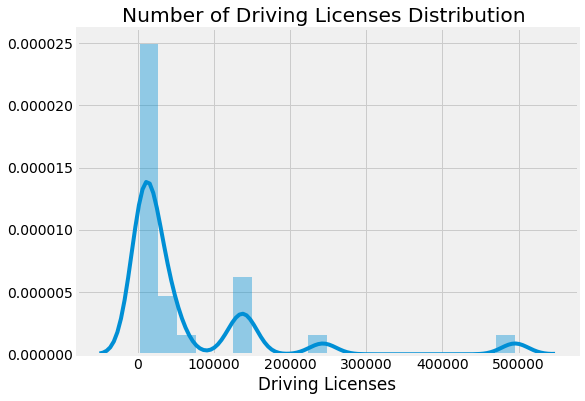

In [3208]:
sns.distplot(inner_merge.driving_licenses, bins=20);
plt.title('Number of Driving Licenses Distribution ');
plt.xlabel('Driving Licenses');

Average number of driving licenses issued is 62507.
The standard deviation is 107293 which means that the numbers of driving licenses are more spread out.
The lowest number of driving licenses issued is 2153.
25% of driving licenses issued were lower than 8363.
50% of driving licenses issued were lower than 16085.
75% of driving licenses issued were lower than 51222.
The highest number of driving licenses issued is 495307.

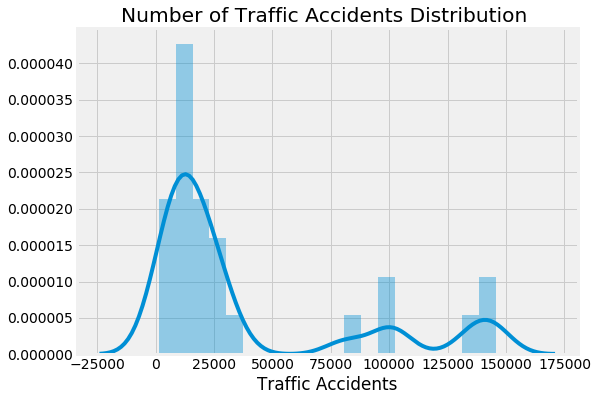

In [3209]:
sns.distplot(inner_merge.accidents, bins=20)
plt.title('Number of Traffic Accidents Distribution ');
plt.xlabel('Traffic Accidents');

Average number of traffic accidents reported is 38225.
The standard deviation is 46493 which means that the numbers of traffic accidents are more spread out.
The lowest number of accidents reported is 1414.
25% of traffic accidents reported were lower than 10276.
50% of traffic accidents reported were lower than 16050.
75% of traffic accidents reported were lower than 30981.
The highest number of traffic accidents reported is 145541.

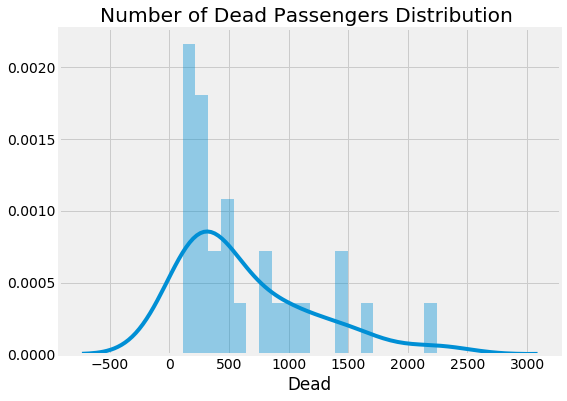

In [3212]:
sns.distplot(inner_merge.dead, bins=20)
plt.title('Number of Dead Passengers Distribution');
plt.xlabel('Dead');

Average number of dead passengers reported is 635.
The standard deviation is 549 which means the numbers of dead passengers are close to the average.
The lowest number of dead passengers reported is 112.
25% of number of dead passengers reported were lower than 241.
50% of number of dead passengers reported were lower than 415.
75% of number of dead passengers reported than 929..
The highest number of number of dead passengers reported is 2243.

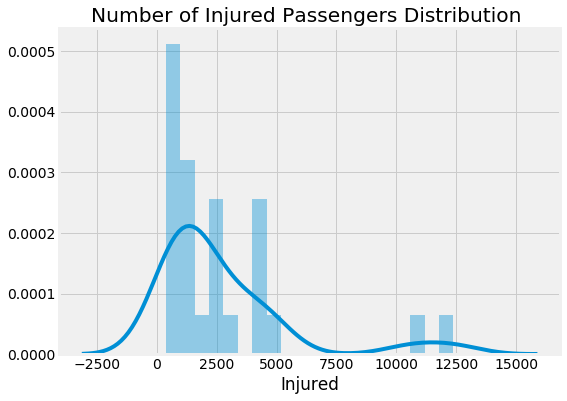

In [3215]:
sns.distplot(inner_merge.injured, bins=20);
plt.title('Number of Injured Passengers Distribution ');
plt.xlabel('Injured');

Average number of injured passengers reported is 2743.
The standard deviation is 2922 which means the numbers of injured people are somewhat close to the average.
The lowest number of injured passengers reported is 374.
25% of number of injured passengers reported were lower than 923.
50% of number of injured passengers reported were lower than 1618.
75% of number of injured passengers reported than 3784.
The highest number of number of injured passengers reported is 12383.

Both distributions are observed to be not normal (positively skewed)

#### Statistical Evaluation of Distributions 

Null hypothesis:
H0: we assume that Driving Licenses and Traffic Accidents are normally distributed.

Alternative hypothesis:
H1: we assume that Driving Licenses and Traffic Accidents are not normally distributed.

In [2718]:
d = list(outer_merge['driving_licenses'])
stat, p = normaltest(d)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Driving licenses sample is probably normally distributed')
else:
    print('Driving licenses sample is probably not normally distributed')

stat=325.634, p=0.000
Driving licenses sample is probably not normally distributed


In [2720]:
d = list(inner_merge['accidents'])
stat, p = normaltest(d)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Traffic accidents sample is probably normally distributed')
else:
    print('Traffic accidents sample is probably not normally distributed')

stat=9.604, p=0.008
Traffic accidents sample is probably not normally distributed


We reject the null hypothesis as both traffic accidents and driving licenses are not normally ditributed.

## Outside Research

Based upon your observations, choose **three** regions that demonstrate interesting trends in the number of driving licenses and traffic accidents. Spend some time doing outside research on provincial and central policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

Answer:


The three regions are Northern Borders, Riyadh , and Eastern Province. Northern Borders has had the lowest number of driving licenses since 1993 until 2014. After investigating, turned out that the Northern Borders is the least populated region of Saudi Arabia. As for Riyadh and Eastern Province, they are considered the most populated regions in Saudi Arabia. This is why we observe the highest number of traffic accidents and driving licenses issued.


Outside Research:


According to the sample we have, we observe there is a positive relationship(correlation) between the number of driving licenses issued and the number of traffic accidents reported. Although, in 2017, we notice that there is a gap between the number of driving licenses issued and traffic accidents reported. There is a decrease in the number of traffic accidents that is not caused by the number of driving licenses issued. Fuel prices can affect the number of road traffic accidents (Dahim, 2018). Dahim suggets there is a negative relationship between fuel prices and road traffic accidents. The increase in fuel prices may also decrease the amount of driving time and distance, therefore making the driver drive in a safer way and in a high fuel-efficient way. This also increases the use of public transportation which reduces the number of traffic accidents. As part of Saudi Vision 2030, Saudi Arabia increased its Fuel prices in 2017. we can conclude that this change may contributed to the decrease in the number of traffic accidents in 2017 that is not related to the number of driving licenses.


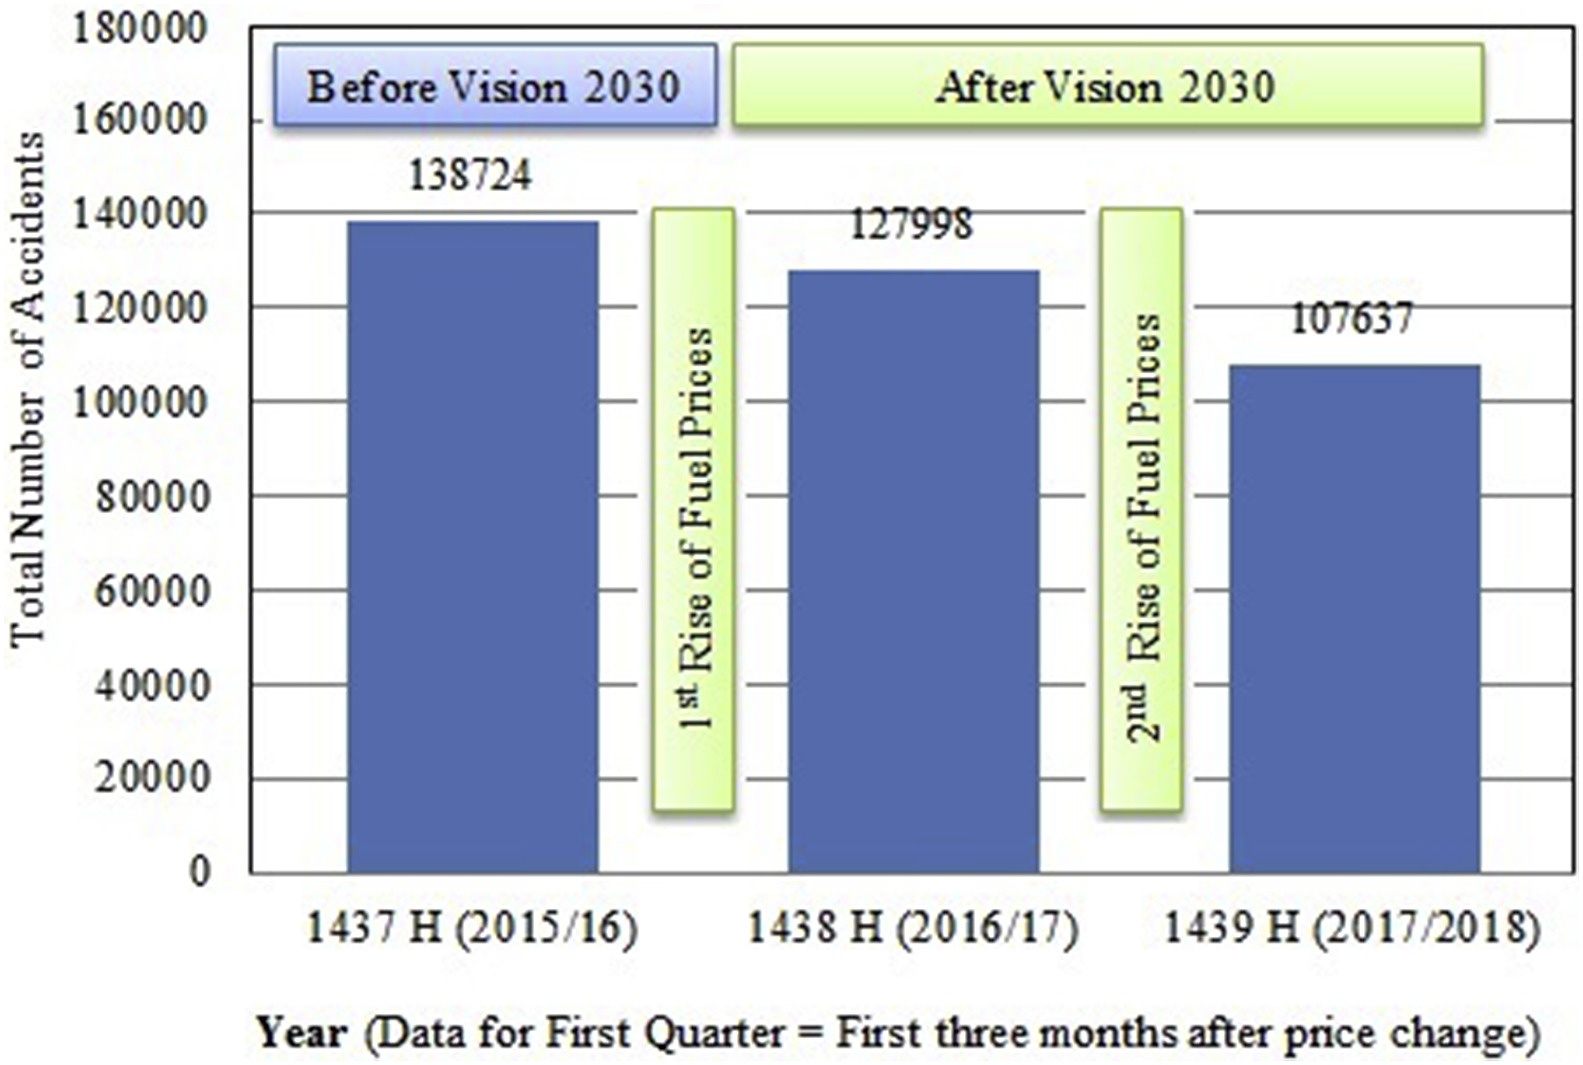


New traffic laws with penalties for violations in Saudi Arabia were implemented in October 2016 and came into force after two weeks. The penalties for different violations were tough, the violator should pay a big amount of money and some of them even include jail. This might have also contributed in the decrease of road traffic accidents that was in year 2017 as the rules were implemented at the end of 2016.


Noticing the positive relationship between the number of driving licenses issued and traffic accidents tells us something. There could be something wrong with the procedure of issuing a driving license. Saudi Arabia gives immediate test for getting a driving licenses. Upon 2017, Mohammed bin Abdullah Al-Bassami, The director general of Traffic Department, announced the cancelation of the immediate test for a driving license, emphasizing that those who wish to obtain licenses must attend driving training courses for a total of 90-hour training course, and 30-hour training course for skilled drivers. This can also be the case for the gap between the number of driving licenses issued and the number of traffic accidents reported. In other words, this might be the cause of the decrease in taffic accidents in 2017.


In 2014, Uber has been launched in Riyadh and Eastern province in 2015. Uber is an online service that connects local drivers with passengers in need. We noticed there was a significant drop in the number of driving licenses issues in the year 2015. Associating Uber launch might be the case of the decrease of the number of driving licenses issued in that year. people who do not own driving licenses can use Uber for running their errands.




https://www.sciencedirect.com/science/article/pii/S2352646718300553#fig1

http://live.saudigazette.com.sa/article/164574/New-traffic-laws-in-15-days

https://www.arabnews.com/node/1193081/saudi-arabia

https://www.uber.com/en-SA/newsroom/ksa2/

https://www.uber.com/en-SA/blog/your-uber-has-just-arrived-bahrain-2/




## Conclusions and Recommendations

- Based on your exploration of the data, what are you key takeaways and recommendations?
- Are there additional data you desire that would better inform your investigations?

Answer:

- Riyadh, Eastern Province, and Makkah have the highest traffic accidents and driving licenses issued.
- There is a positive relationship between number of driving licenses issued and number of accidents.
- The drop of the number of driving licenses issued in 2015 is caused by the launch of Uber in Saudi Arabia.

The number of traffic accidents in comparison to the number of driving licenses issued in 2017 dropped by almost 36% compared 2016. The followings might be the causes:

- The gap between number of driving licenses and traffic accidents might have been caused by the increase of fuel prices to support 2030 vision as it decreased the number of traffic accidents.
- The gap between number of driving licenses and traffic accidents might have been caused by canceling the immediate driving license test as it decreased the number of traffic accidents.
- The decrease of the number of traffic accidents might have been caused by the implementation of new traffic laws followed by penalties for violations.

For further investigation into the case, Future years of number of accidents/driving licenses would be beneficial to further support my claims.